In [1]:
from tensorflow import keras
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image 

In [2]:
#Data
Train_data_gen = image.ImageDataGenerator(rescale=1./255)
Test_data_gen = image.ImageDataGenerator(rescale=1./255)

In [3]:
train_set = Train_data_gen.flow_from_directory("Photographs/train",target_size=(150,150),class_mode="binary")

Found 400 images belonging to 2 classes.


In [4]:
test_set = Test_data_gen.flow_from_directory("Photographs/test",target_size=(150,150),class_mode="binary")

Found 100 images belonging to 2 classes.


In [5]:
#Model

In [6]:
model = Sequential()

In [7]:
model.add(Conv2D(64,(3,3),input_shape=(150,150,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))

In [8]:
model.add(Flatten())

In [9]:
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=12,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [11]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [13]:
model.fit(train_set,epochs=20,validation_data=test_set)

Epoch 1/20
13/13 [==============================] - 10s 793ms/step - loss: 0.0999 - accuracy: 0.9550 - val_loss: 0.1698 - val_accuracy: 0.9100
Epoch 2/20
13/13 [==============================] - 10s 760ms/step - loss: 0.0986 - accuracy: 0.9550 - val_loss: 0.2608 - val_accuracy: 0.9400
Epoch 3/20
13/13 [==============================] - 10s 769ms/step - loss: 0.1038 - accuracy: 0.9525 - val_loss: 0.2101 - val_accuracy: 0.9100
Epoch 4/20
13/13 [==============================] - 10s 794ms/step - loss: 0.0795 - accuracy: 0.9700 - val_loss: 0.3138 - val_accuracy: 0.9000
Epoch 5/20
13/13 [==============================] - 10s 794ms/step - loss: 0.0542 - accuracy: 0.9800 - val_loss: 0.2188 - val_accuracy: 0.9400
Epoch 6/20
13/13 [==============================] - 10s 777ms/step - loss: 0.0199 - accuracy: 0.9925 - val_loss: 0.2534 - val_accuracy: 0.9200
Epoch 7/20
13/13 [==============================] - 10s 800ms/step - loss: 0.0369 - accuracy: 0.9900 - val_loss: 0.1491 - val_accuracy: 0.9500

In [15]:
model.save('Assignment1.h5')

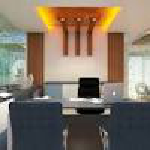

In [32]:
test_image = image.load_img('Photographs\\validation\\indoor\\images261.jpg' ,target_size =(150,150))
test_image

In [33]:
img = image.img_to_array(test_image)
img = img.reshape(1,150,150,3)

In [34]:
result = model.predict(img)

In [35]:
result

array([[0.]], dtype=float32)

In [36]:
train_set.class_indices

{'indoor': 0, 'outdoor': 1}

In [37]:
if result == 1:
    prediction = 'outdoor'
else:
    prediction = 'indoor'
prediction

'indoor'